<a href="https://colab.research.google.com/github/appodsvirov/3D_ML_opencv/blob/main/Opencv_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1
В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры.   
Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.  

Пример результата с подсказкой содержит изображение railway_result.png.   

Подсказка 2:  
Чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.


Исходное изображение:


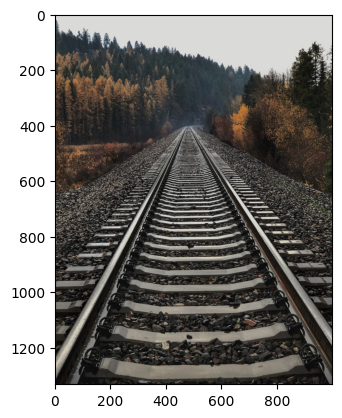

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
print("Исходное изображение:")
image = cv.cvtColor(cv.imread("/content/railway.jpeg"), cv.COLOR_BGR2RGB)
plt.imshow(image)

Должно получиться:


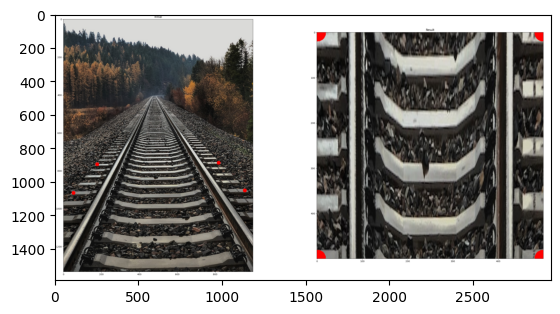

In [ ]:
result = cv.cvtColor(cv.imread("/content/railway_result.png"), cv.COLOR_BGR2RGB)
print("Должно получиться:")
plt.imshow(result)

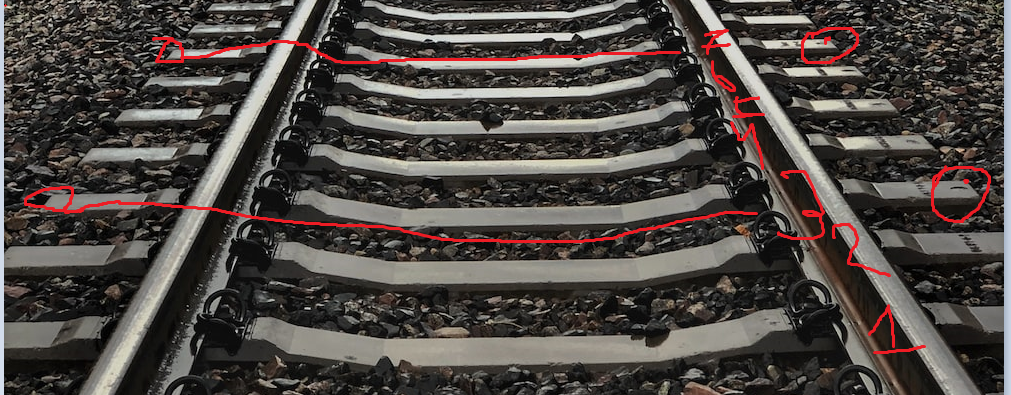

Ответ: 


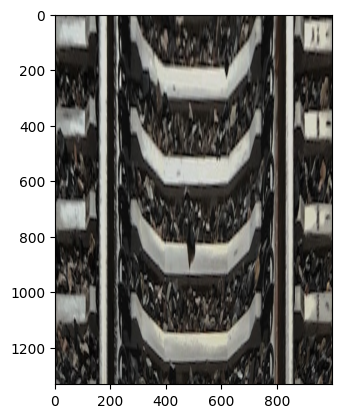

In [16]:
# Эти точки должны образовывать четырехугольник, который будет преобразован в прямоугольник
points_A = np.float32([[169, 764], [824, 752], [48, 907], [964, 895]])

# Координаты для нового изображения должны образовывать прямоугольник
points_B = np.float32([[0, 0], [image.shape[1], 0], [0, image.shape[0]], [image.shape[1], image.shape[0]]])


# Применяем перспективное преобразование
matrix = cv.getPerspectiveTransform(points_A, points_B)
answer = cv.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

print("Ответ: ")
plt.imshow(answer)


#Задание 2
 В папке находится изображение palm.png с пальмой.  
  Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке.  
   Пример результата находится в изображении palm_result.png


Исходное изображение:


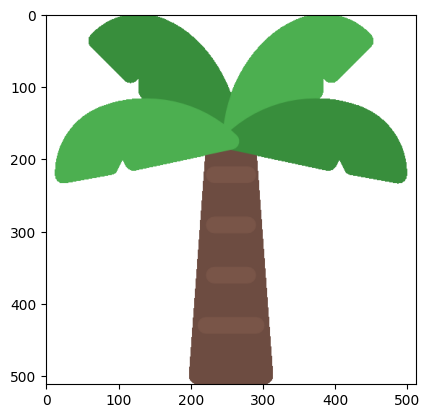

In [51]:
print("Исходное изображение:")
image = cv.cvtColor(cv.imread("/content/palm.png"), cv.COLOR_BGR2RGB)
plt.imshow(image)

Должно получиться:


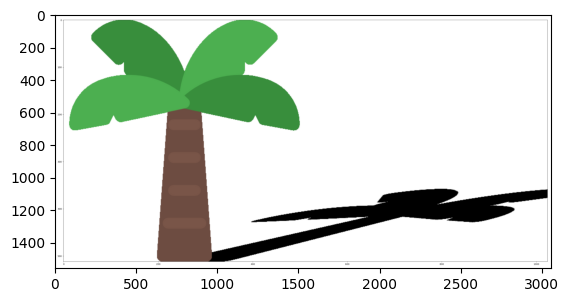

In [52]:
result = cv.cvtColor(cv.imread("/content/palm_result.png"), cv.COLOR_BGR2RGB)
print("Должно получиться:")
plt.imshow(result)

Расширим изображение, добавив справа пустую область


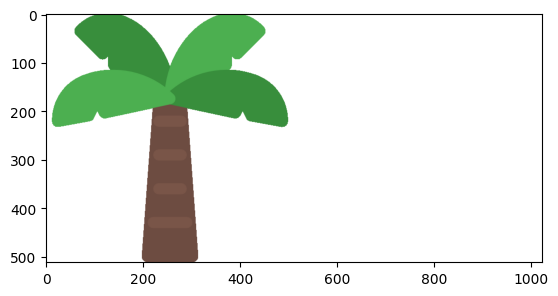

In [53]:
height, width = image.shape[:2]
new_image = np.ones((height, int(width * 2), 3), dtype=np.uint8) * 255
new_image[:, :width, :] = image
image = new_image
print("Расширим изображение, добавив справа пустую область");
plt.imshow(image)

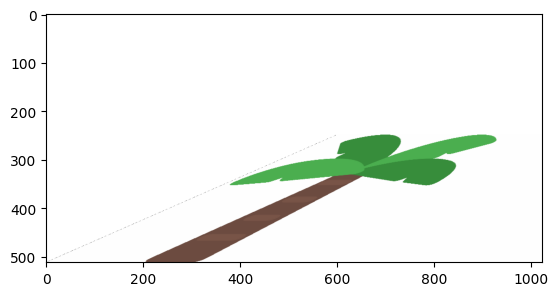

In [130]:
# Эти точки должны образовывать четырехугольник, который будет преобразован в прямоугольник
points_A = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
              #левая верхняя, правая верхняя
# Координаты для нового изображения должны образовывать прямоугольник
x, y = 600, 250
dx = 400
points_B = np.float32([[x, y], [x+dx, y], [0, height], [width, height]])


# Применяем перспективное преобразование
matrix = cv.getPerspectiveTransform(points_A, points_B)
shadow = cv.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))



new_image = np.ones((image.shape[0], image.shape[1], 3), dtype=np.uint8) * 255
print("")
plt.imshow(new_image + shadow)

Ответ: 


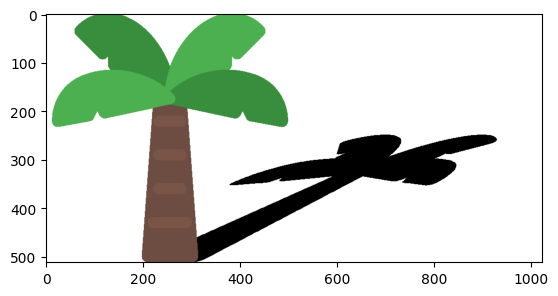

In [132]:
#Заменяем пиксели на черные там, где есть тень и нет пальмы
# + убираем "серую полоску" у shadow у которой r == g == b
answer = image.copy()
for h in range(answer.shape[0]):
  for w in range(answer.shape[1]):
    if (shadow[h][w] != [0, 0, 0]).all() and (shadow[h][w] != [255, 255, 255]).all()\
    and (answer[h][w] == [255, 255, 255]).all()\
    and (shadow[h][w][0] != shadow[h][w][1])\
    and (shadow[h][w][1] != shadow[h][w][2]) :
      answer[h][w] = [0,0,0]
answer
print("Ответ: ")
plt.imshow(answer)